# Figure 1 and Supplementary figure 2: BALTIC tree plotting

September 23, 2019 

This notebook contains code for producing Figure 1 and supplemental figure 2. This code will read in nextstrain jsons, plot full genome trees with baltic, and pull out subtrees containing my Cambodian samples described in the paper. 

In [132]:
import sys, subprocess, glob, os, shutil, re, importlib
from subprocess import call
import imp
bt = imp.load_source('baltic', '/Users/lmoncla/src/baltic/baltic.py')

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties

import numpy as np
from scipy.special import binom

import datetime as dt

mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.size']=22
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

In [133]:
def convertDate(x,start,end):
    """ Converts calendar dates between given formats """
    return dt.datetime.strftime(dt.datetime.strptime(x,start),end)

## Read in tree jsons as baltic tree objects

In [134]:
PB2='/Users/lmoncla/src/h5n1-cambodia/data/tree-jsons/flu_avian_h5n1_pb2_tree.json'
PB1='/Users/lmoncla/src/h5n1-cambodia/data/tree-jsons/flu_avian_h5n1_pb1_tree.json'
PA='/Users/lmoncla/src/h5n1-cambodia/data/tree-jsons/flu_avian_h5n1_pa_tree.json'
HA='/Users/lmoncla/src/h5n1-cambodia/data/tree-jsons/flu_avian_h5n1_ha_tree.json'
NP='/Users/lmoncla/src/h5n1-cambodia/data/tree-jsons/flu_avian_h5n1_np_tree.json'
NA='/Users/lmoncla/src/h5n1-cambodia/data/tree-jsons/flu_avian_h5n1_na_tree.json'
MP='/Users/lmoncla/src/h5n1-cambodia/data/tree-jsons/flu_avian_h5n1_mp_tree.json'
NS='/Users/lmoncla/src/h5n1-cambodia/data/tree-jsons/flu_avian_h5n1_ns_tree.json'

json_translation={'absoluteTime':'num_date','height':'branch_length','name':'strain'} ## allows baltic to find correct attributes in JSON, height and name are required at a minimum
PB2_json_meta={'file':PB2.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org
PB1_json_meta={'file':PB1.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org
PA_json_meta={'file':PA.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org
HA_json_meta={'file':HA.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org
NP_json_meta={'file':NP.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org
NA_json_meta={'file':NA.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org
MP_json_meta={'file':MP.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org
NS_json_meta={'file':NS.replace('tree','meta'),'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org

PB2_tree=bt.loadJSON(PB2,json_translation) ## give loadJSON the name of the tree file, the translation dictionary and (optionally) the meta file
PB1_tree =bt.loadJSON(PB1,json_translation)
PA_tree =bt.loadJSON(PA,json_translation)
HA_tree =bt.loadJSON(HA,json_translation)
NP_tree =bt.loadJSON(NP,json_translation)
NA_tree =bt.loadJSON(NA,json_translation)
MP_tree =bt.loadJSON(MP,json_translation)
NS_tree =bt.loadJSON(NS,json_translation)


Tree height: 53.341950
Tree length: 3030.256033
annotations present

Numbers of objects in tree: 7254 (3191 nodes and 4063 leaves)


Tree height: 43.983810
Tree length: 3107.445536
annotations present

Numbers of objects in tree: 6944 (3077 nodes and 3867 leaves)


Tree height: 44.199351
Tree length: 3972.771077
annotations present

Numbers of objects in tree: 7361 (3279 nodes and 4082 leaves)


Tree height: 28.868050
Tree length: 3812.458188
annotations present

Numbers of objects in tree: 11418 (4987 nodes and 6431 leaves)


Tree height: 44.408307
Tree length: 2965.364199
annotations present

Numbers of objects in tree: 7115 (3045 nodes and 4070 leaves)


Tree height: 42.129869
Tree length: 3919.370920
annotations present

Numbers of objects in tree: 9355 (3998 nodes and 5357 leaves)


Tree height: 35.044643
Tree length: 3471.249953
annotations present

Numbers of objects in tree: 6832 (2892 nodes and 3940 leaves)


Tree height: 36.423330
Tree length: 2997.889752
annotations present

## Original Figure 1: shows full genome trees using colors that correspond to nextstrain colors 

In [7]:
trees = [PB2_tree, PB1_tree, PA_tree, HA_tree, NP_tree, NA_tree, MP_tree, NS_tree]
mylist = ["A/duck/Cambodia/PV027D1/2010","A/duck/Cambodia/083D1/2011","A/duck/Cambodia/381W11M4/2013","A/duck/Cambodia/Y0224301/2014","A/duck/Cambodia/Y0224304/2014","A/Cambodia/V0401301/2011","A/Cambodia/V0417301/2011","A/Cambodia/W0112303/2012","A/Cambodia/X0125302/2013","A/Cambodia/X0128304/2013","A/Cambodia/X0207301/2013","A/Cambodia/X0219301/2013","A/Cambodia/X1030304/2013"]

colors = {"china":"#4042C7", "southeast_asia":"#69B091","south_asia":"#5199B7","japan_korea":"#E39B39",
          "west_asia":"#ADBD51","africa":"#CEB541","europe":"#4274CE","north_america":"#DC2F24"}

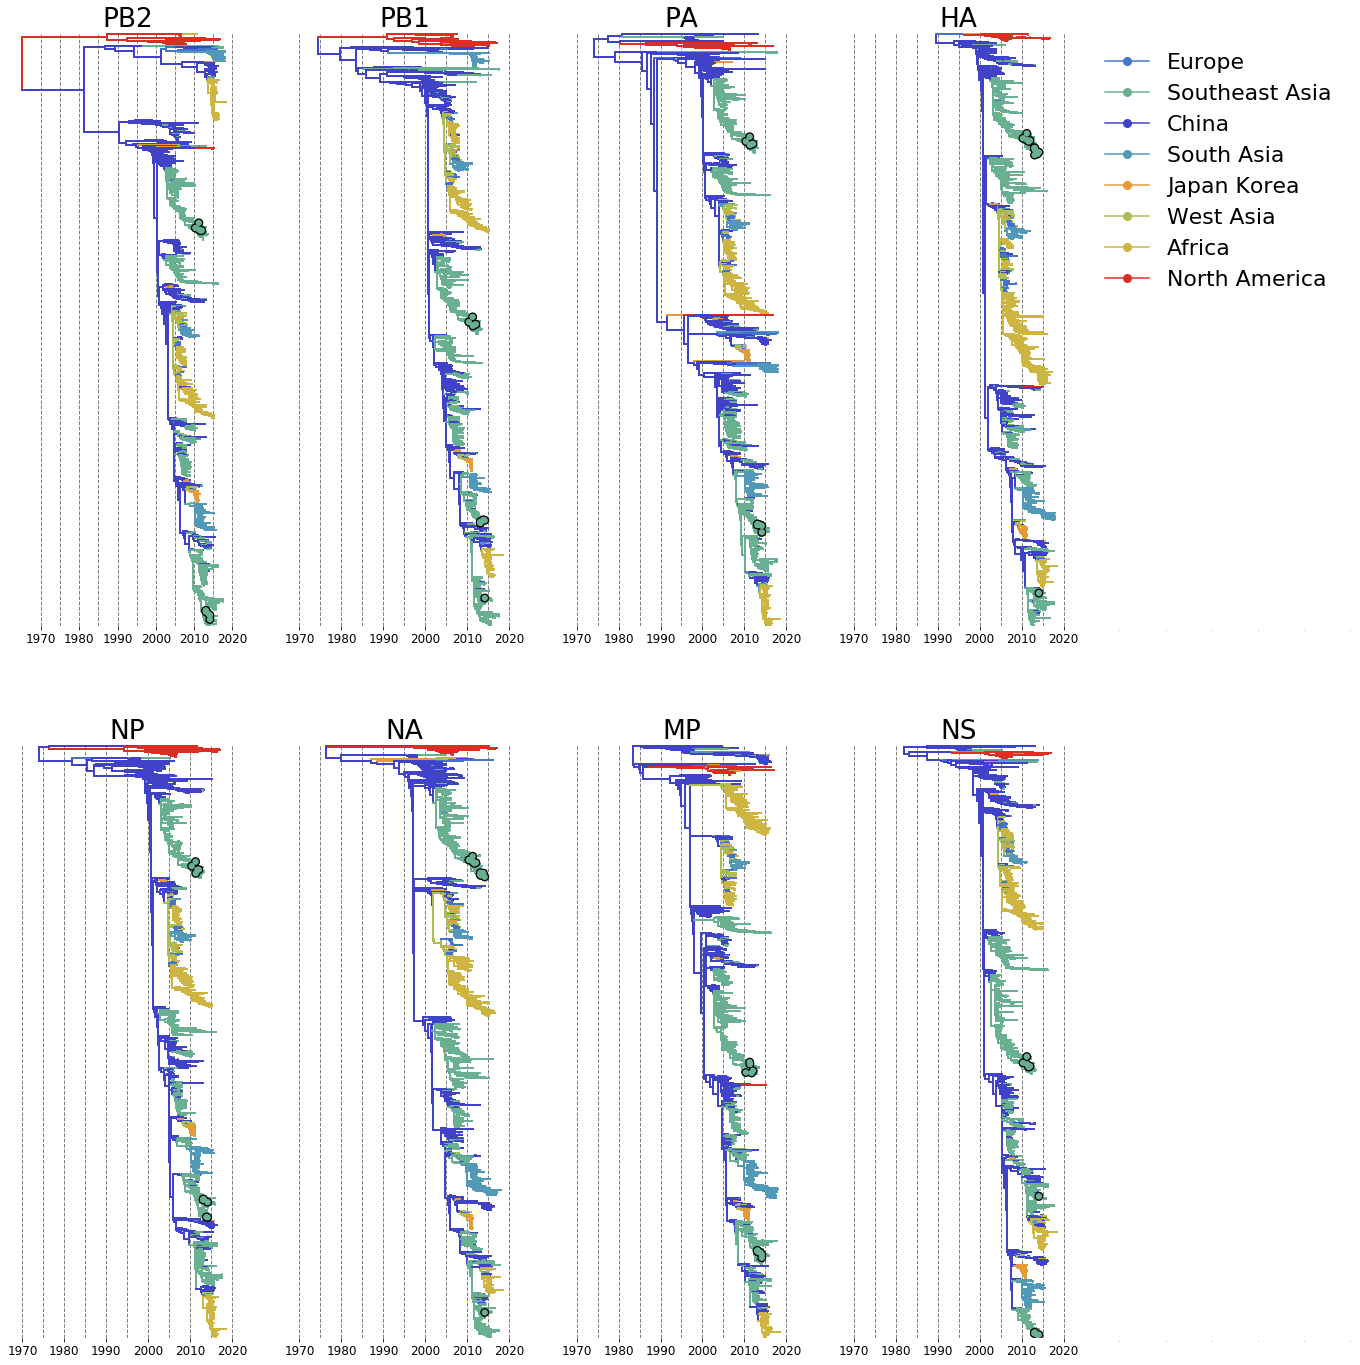

In [7]:
fig,((ax1,ax2,ax3,ax4,ax9),(ax5,ax6,ax7,ax8, ax10)) = plt.subplots(2, 5, figsize=(24,24),facecolor='w')

axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

branchWidth=1 ## default branch width

# this sets the grey vertical shading 
every=5
xDates=['%04d-%02d-01'%(y,m) for y in range(1970,2025) for m in range(0,56)]

# set up the grey areas and dashed lines
for a in axes:

    # this sets the vertical dashed lines on the tree
    [a.axvline(i,ls='--',lw=1,color='grey',zorder=0) for i in range(1970,2025,5)]


for t,tr in enumerate(trees): ## iterate over trees
    if t == 0:
        a = ax1
        title = "PB2"
    if t == 1:
        a = ax2
        title = "PB1"
    if t == 2: 
        a = ax3
        title = "PA"
    if t == 3:
        a = ax4
        title = "HA"
    if t == 4:
        a = ax5
        title = "NP"
    if t == 5:
        a = ax6
        title = "NA"
    if t == 6: 
        a = ax7
        title = "MP"
    if t == 7:
        a = ax8
        title = "NS"
    
    # copied and pasted from above
    for k in tr.Objects: ## iterate over objects in tree
        
        x=k.absoluteTime ## or from x position determined earlier
        y=k.y ## get y position from .drawTree that was run earlier, but could be anything else
    
        xp=k.parent.absoluteTime ## get x position of current object's parent
        if x==None: ## matplotlib won't plot Nones, like root
            x=0.0
        if xp==None:
            xp=x
        
        c='k'
        if k.traits.has_key(PB2_json_meta['traitName']):
            c=tr.cmap[k.traits[PB2_json_meta['traitName']]]
    
        branchWidth=2
    
        if k.branchType=='leaf': ## if leaf...
            if k.traits['strain'] in mylist:
                s=40 ## tip size can be fixed
                shape = 'o'
            else:
                s=0
                shape = 'o'
            
            # mark A/Goose/Guangdong/1/1996 with an X
            #if k.traits['strain'] == 'A/Goose/Guangdong/1/1996':
                #c="#000000"
                #shape = "X"
                #s=120
            #else:
                #shape = 'o'

        
            a.scatter(x,y,s=s,facecolor=c,edgecolor='none',marker=shape,zorder=11) ## plot circle for every tip
            a.scatter(x,y,s=s*2,facecolor='k',edgecolor='none',marker=shape,zorder=10) ## plot black circle underneath
    
        elif k.branchType=='node': ## if node...
            #branchWidth+=10.0*len(k.leaves)/float(L)   # make deeper branches fatter
            #c="#9F9F9F"
        
            if len(k.children)==1:
                a.scatter(x,y,facecolor=c,s=50,edgecolor='none',zorder=10,lw=2,marker='|') ## mark every node in the tree to highlight that it's a multitype tree
            a.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color=c,ls='-',zorder=9,solid_capstyle='round')
        
        a.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=9)

    
    # set axis limits, remove border lines         
    a.spines['left'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    
    a.set_ylim(-5,tr.ySpan+5)
    a.tick_params(axis='y',labelsize=0,size=0)
    a.set_yticklabels([])
    #a.grid(axis='x',ls='-',color='grey')
    a.set_xticks([1970, 1980, 1990, 2000, 2010, 2020])
    a.set_xticklabels([1970, 1980, 1990, 2000, 2010, 2020], fontsize=12)

    
    # add a title to each subplot
    a.set_title(title)
    
# add in a legend
han_list = []

for key in colors:
    marker = mlines.Line2D(range(1), range(1), color = colors[key], marker='o', markerfacecolor = colors[key], label = key.replace("_"," ").title(), markersize = 8)
    han_list.append(marker)
ax9.legend(handles = han_list,markerfirst = True, frameon=False, loc=1)

# format legend and empty plot; set axis limits, remove border lines         
ax9.spines['left'].set_visible(False)
ax9.spines['right'].set_visible(False)
ax9.spines['top'].set_visible(False)
ax9.spines['bottom'].set_visible(False)
ax9.tick_params(axis='y',labelsize=0,size=0)
ax9.tick_params(axis='x',labelsize=0,size=0)
ax9.set_yticklabels([])
ax10.spines['left'].set_visible(False)
ax10.spines['right'].set_visible(False)
ax10.spines['top'].set_visible(False)
ax10.spines['bottom'].set_visible(False)
ax10.tick_params(axis='y',labelsize=0,size=0)
ax10.tick_params(axis='x',labelsize=0,size=0)
ax10.set_yticklabels([])


#plt.savefig('/Users/lmoncla/Documents/H5N1_Cambodian_outbreak_study/paper-and-figure-drafts/figures-2019-02-20/Fig-1-tree-2019-03-01.pdf')
plt.show()


## New Figure 1: Full genome trees with callouts to subtrees containing the Cambodia samples described in the paper. 

As per a reviewer suggestion, make a smaller tree where you can clearly see duck vs. human samples 

In [135]:
my_list = ["A/duck/Cambodia/PV027D1/2010","A/duck/Cambodia/083D1/2011","A/duck/Cambodia/381W11M4/2013","A/duck/Cambodia/Y0224301/2014","A/duck/Cambodia/Y0224304/2014","A/Cambodia/V0401301/2011","A/Cambodia/V0417301/2011","A/Cambodia/W0112303/2012","A/Cambodia/X0125302/2013","A/Cambodia/X0128304/2013","A/Cambodia/X0207301/2013","A/Cambodia/X0219301/2013","A/Cambodia/X1030304/2013"]
clade_1_list = ["A/duck/Cambodia/PV027D1/2010","A/duck/Cambodia/083D1/2011","A/Cambodia/V0401301/2011","A/Cambodia/V0417301/2011","A/Cambodia/W0112303/2012"]
clade_re_list = ["A/duck/Cambodia/381W11M4/2013","A/duck/Cambodia/Y0224301/2014","A/duck/Cambodia/Y0224304/2014","A/Cambodia/X0125302/2013","A/Cambodia/X0128304/2013","A/Cambodia/X0207301/2013","A/Cambodia/X0219301/2013","A/Cambodia/X1030304/2013"]

In [136]:
def return_subtree_HA_NA(tree):
    subtrees = []
    
    for k in tree.Objects: 
        if k.branchType == 'node':
            count = 0
            for m in my_list: 
                if m in k.leaves:
                    count += 1
            if count == 12:
                parent_node = k 
                subtree1 = tree.subtree(parent_node)
                
        if k.branchType == 'leaf' and k.name == 'A/duck/Cambodia/Y0224304/2014':
            parent_node = k.parent
            subtree2 = tree.subtree(parent_node)
        
    subtrees.append(subtree1)
    subtrees.append(subtree2)
                
    return(subtrees)

In [137]:
def return_subtree_PB2_PA_NP_MP(tree):
    subtrees = []
    
    for k in tree.Objects: 
        if k.branchType == 'node':
            
            # first, query clade 1
            count = 0
            for m in clade_1_list: 
                if m in k.leaves:
                    count += 1
            if count == 5:
                parent_node = k 
                subtree1 = tree.subtree(parent_node)
            
            # then, query clade 2
            count = 0
            for m in clade_re_list: 
                if m in k.leaves:
                    count += 1
            if count == 8:
                parent_node = k 
                subtree2 = tree.subtree(parent_node)
    
    subtrees.append(subtree1)
    subtrees.append(subtree2)
                                
    return(subtrees)

In [138]:
def return_subtree_PB1_NS(tree):
    subtrees = []
    
    for k in tree.Objects: 
        if k.branchType == 'node':
            
            count = 0
            for m in clade_1_list: 
                if m in k.leaves:
                    count += 1
            if count == 5:
                parent_node = k 
                subtree1 = tree.subtree(parent_node)
            
            count = 0
            for m in clade_re_list: 
                if m in k.leaves:
                    count += 1
            if count == 7:
                parent_node = k 
                subtree2 = tree.subtree(parent_node)
                
        if k.branchType == 'leaf' and k.name == 'A/duck/Cambodia/Y0224304/2014':
            parent_node = k.parent
            subtree3 = tree.subtree(parent_node)

    subtrees.append(subtree1)
    subtrees.append(subtree2)
    subtrees.append(subtree3)

    return(subtrees)

In [139]:
def find_max_and_min_y_values(subtrees):
    max_min_y_values = []
    
    for tree in subtrees:
        yvalues = []
        for k in tree.Objects:
            yvalues.append(k.y)
        maximum = max(yvalues)
        minimum = min(yvalues)
        max_min_y_values.append({"max":maximum,"min":minimum,"tree":tree})
    
    # this will sort the list by the max attribute, going from smallest to largest
    max_min_y_values = sorted(max_min_y_values, key=lambda i: i['max'], reverse=False)
    return(max_min_y_values)

In [140]:
def calculate_differences_between_trees(max_min_y_values):
    values_to_subtract = {}
    value_to_subtract = 0
    
    for i in range(1, len(max_min_y_values)):
        value_to_subtract += max_min_y_values[i]['min'] - max_min_y_values[i-1]['max'] - 10
        tree = max_min_y_values[i]['tree']
        
        values_to_subtract[tree] = value_to_subtract
    
    return(values_to_subtract)

## Pull out subtrees containing my Cambodian samples for which we have within-host data

In [141]:
# enumerate subtrees for all trees
PB2_subtrees = return_subtree_PB2_PA_NP_MP(PB2_tree)
PB1_subtrees = return_subtree_PB1_NS(PB1_tree)
PA_subtrees = return_subtree_PB2_PA_NP_MP(PA_tree)
HA_subtrees = return_subtree_HA_NA(HA_tree)
NP_subtrees = return_subtree_PB2_PA_NP_MP(NP_tree)
NA_subtrees = return_subtree_HA_NA(NA_tree)
MP_subtrees = return_subtree_PB2_PA_NP_MP(MP_tree)
NS_subtrees = return_subtree_PB1_NS(NS_tree)

In [142]:
gene_subtrees = {"PB2":PB2_subtrees, "PB1":PB1_subtrees,"PA":PA_subtrees,"HA":HA_subtrees,"NP":NP_subtrees,
        "NA":NA_subtrees,"MP":MP_subtrees,"NS":NS_subtrees}

In [143]:
for g in gene_subtrees: 
    print(g, len(gene_subtrees[g]))

PB2 2
PB1 3
PA 2
HA 2
NP 2
NA 2
MP 2
NS 3


## Plot PB2 and HA side by side with closeup of the clades 

This will become Figure 1, and the full genome phylogeny with all the cutouts will be a supplemental figure. I would like to show PB2 and HA to show that the 2013 viruses are reassortants.  

In [144]:
full_trees_HA_PB2 = {"PB2":PB2_tree, "HA":HA_tree}
gene_subtrees_HA_PB2 = {"PB2":PB2_subtrees, "HA":HA_subtrees}

In [145]:
region_colors = {"china":"#2664A5","southeast_asia":"#E7BC96","south_asia":"#B2313D","japan_korea":"#EF9E98",
                 "west_asia":"#9281AC","africa":"#5CA7A4","europe":"#50357A","north_america":"#E68234",
                 "":"#ffffff","":"#ffffff","":"#ffffff","human":"#C75643", "duck":"#545AB7"}

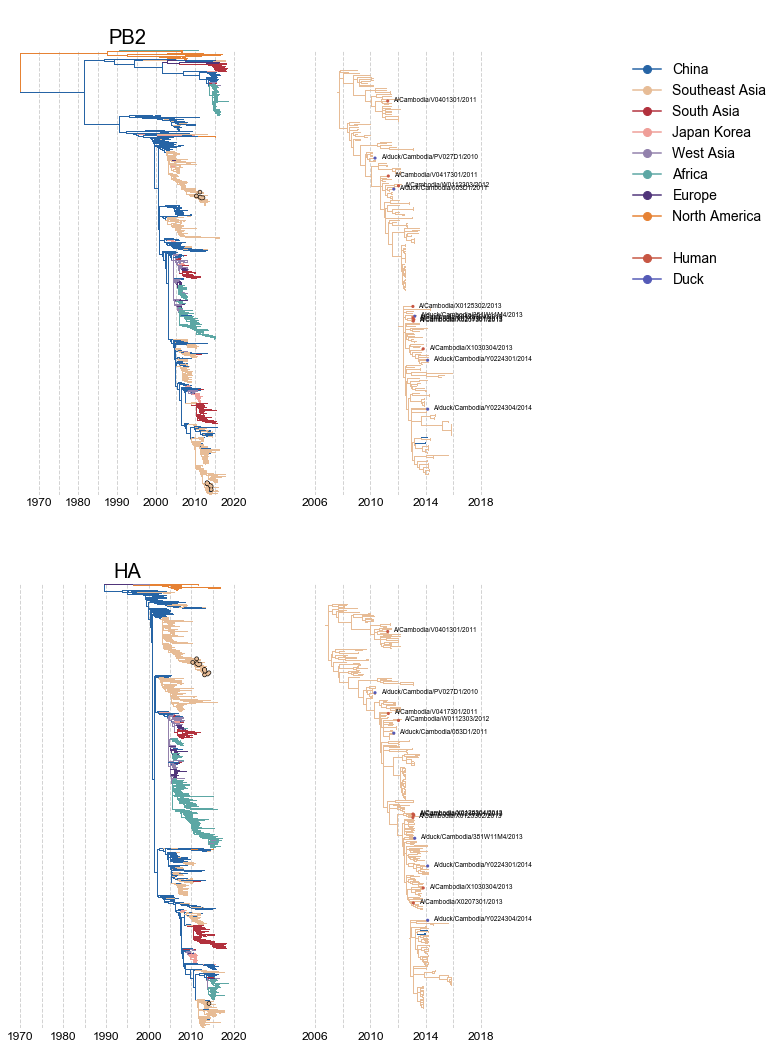

In [146]:
fig,((ax1,ax2,ax5),(ax3,ax4,ax6)) = plt.subplots(2,3, gridspec_kw={'width_ratios': [4,4,1], 'wspace':0.4}, figsize=(12,18),facecolor='w')  # the dimensions here are width x height

full_trees_axes_dict = {"PB2":ax1,"HA":ax3}   
subtrees_axes_dict = {"PB2":ax2,"HA":ax4}

branchWidth=1 ## default branch width

# this sets the grey vertical dotted lines
every=5
xDates=['%04d-%02d-01'%(y,m) for y in range(1970,2025) for m in range(0,56)]

for f in full_trees_HA_PB2: 
    a = full_trees_axes_dict[f]
    [a.axvline(i,ls='--',lw=1,color='#D3D3D3',zorder=0) for i in range(1970,2025,5)]
    full_tree = full_trees[f]
    title =  "\n"+ f 
    
    for k in full_tree.Objects: ## iterate over objects in tree

        x=k.absoluteTime ## or from x position determined earlier
        y=k.y ## get y position from .drawTree that was run earlier, but could be anything else

        xp=k.parent.absoluteTime ## get x position of current object's parent
        if x==None: ## matplotlib won't plot Nones, like root
            x=0.0
        if xp==None:
            xp=x

        c='k'
        c=region_colors[k.traits['region']]

        if k.branchType=='leaf': ## if leaf...
            if k.traits['strain'] in mylist:
                s=10## tip size can be fixed
                shape = 'o'
            else:
                s=0
                shape = 'o'

            a.scatter(x,y,s=s,facecolor=c,edgecolor='none',marker=shape,zorder=11) ## plot circle for every tip
            a.scatter(x,y,s=s*2,facecolor='k',edgecolor='none',marker=shape,zorder=10) ## plot black circle underneath

        elif k.branchType=='node': ## if node...
            #branchWidth+=10.0*len(k.leaves)/float(L)   # make deeper branches fatter
            #c="#9F9F9F"

            if len(k.children)==1:
                a.scatter(x,y,facecolor=c,s=50,edgecolor='none',zorder=10,lw=branchWidth,marker='|') ## mark every node in the tree to highlight that it's a multitype tree
            a.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color=c,ls='-',zorder=9,solid_capstyle='round')

        a.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=9)


    # set axis limits, remove border lines         
    a.spines['left'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)
    a.spines['bottom'].set_visible(False)

    a.set_ylim(-5,full_tree.ySpan+5)
    a.tick_params(axis='y',labelsize=0,size=0)
    a.tick_params(axis='x',labelsize=16,size=0)
    a.set_yticklabels([])
    #a.grid(axis='x',ls='-',color='grey')
    a.set_xticks([1970, 1980, 1990, 2000, 2010, 2020])
    a.set_xticklabels([1970, 1980, 1990, 2000, 2010, 2020], fontsize=12)
    
    # add a title to each subplot
    a.set_title(title,fontsize=20)

##############################################################
## CLOSEUP TREE ##
##############################################################
branchWidth = 1
tipSize = 10
label_text_size = 6.5

branchwidth_func = lambda k: branchWidth

cumulative_y = 0
x_attr=lambda k: k.absoluteTime
y_attr=lambda k: k.y - y_value_to_subtract

tip_c_func=lambda k: not_mine_color if k.traits['strain'] not in my_list else (duck_color if "duck" in k.traits['strain'] else human_color)
node_c_func=lambda k: region_colors[k.traits['region']]
s_func = lambda k: 0 if k.traits['strain'] not in my_list else tipSize
z_func=lambda k: 99 if k.traits['strain'] not in my_list else 100

# labels
label_target_func = lambda k:k.branchType=='leaf' and k.traits['strain'] in my_list
label_position_func = lambda k:(k.absoluteTime + (k.absoluteTime*0.0002), k.y-y_value_to_subtract-0.5)
label_text_func = lambda k:k.traits['strain']

for g in gene_subtrees_HA_PB2:
    
    # set up axes, values to subtract
    a = subtrees_axes_dict[g]
    [a.axvline(i,ls='--',lw=1,color='#D3D3D3',zorder=0) for i in range(2006,2020,2)]
    title = "\n" + g 

    max_min_y_values = find_max_and_min_y_values(gene_subtrees[g])
    values_to_subtract = calculate_differences_between_trees(max_min_y_values)
    
    for subtree in gene_subtrees[g]:

        # subtract y values to rescale plotting area
        if subtree in values_to_subtract:
            y_value_to_subtract = values_to_subtract[subtree]
        else:
            y_value_to_subtract = 0

        subtree.plotTree(a,x_attr=x_attr,y_attr=y_attr, colour_function=node_c_func,branchWidth=branchwidth_func)
        subtree.plotPoints(a,x_attr=x_attr,y_attr=y_attr, size_function=s_func,
                                        colour_function=tip_c_func,zorder_function=z_func)
        subtree.addText(a,target=label_target_func,position=label_position_func,text=label_text_func,size=label_text_size)

        # set axis limits, remove border lines         
        a.spines['left'].set_visible(False)
        a.spines['right'].set_visible(False)
        a.spines['top'].set_visible(False)
        a.spines['bottom'].set_visible(False)

        a.set_xlim(2006,2023)
        a.tick_params(axis='y',labelsize=0,size=0)
        a.tick_params(axis='x',labelsize=16,size=0, width=0,color='grey')
        a.set_yticklabels([])
        a.set_xticks([2006,2008,2010,2012,2014,2016,2018])
        a.set_xticklabels([2006,"",2010,"",2014,"",2018], fontsize=12)
        
        # add a title to each subplot
        #a.set_title(title,fontsize=20)


# add in a legend
han_list = []

for key in region_colors:
    marker = mlines.Line2D(range(1), range(1), color = region_colors[key], marker='o', markerfacecolor = region_colors[key], label = key.replace("_"," ").title(), markersize = 8)
    han_list.append(marker)
ax5.legend(handles = han_list,markerfirst = True, frameon=False, loc=2, fontsize=14)

# format legend and empty plot; set axis limits, remove border lines         
ax5.spines['left'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.spines['bottom'].set_visible(False)
ax5.tick_params(axis='y',labelsize=0,size=0)
ax5.tick_params(axis='x',labelsize=0,size=0)
ax5.set_yticklabels([])
ax5.set_xticklabels([])

ax6.spines['left'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.spines['bottom'].set_visible(False)
ax6.tick_params(axis='y',labelsize=0,size=0)
ax6.tick_params(axis='x',labelsize=0,size=0)
ax6.set_yticklabels([])
ax6.set_xticklabels([])
             
plt.savefig('/Users/lmoncla/Documents/H5N1_Cambodian_outbreak_study/paper-and-figure-drafts/Plos-Pathogens/resubmission/individual-PDFs/Fig-1-HA-PB2-trees-2019-09-23.pdf',bbox_inches = 'tight',pad_inches = 0)
plt.show()

## Make a huge supplemental figure with all the genes 

For each gene, have the full tree side by side with the higlighted clades containing my samples. 

In [147]:
# set up dictionaries with all the trees in them 
full_trees = {"PB2":PB2_tree, "PB1":PB1_tree, "PA":PA_tree, "HA":HA_tree, "NP":NP_tree, 
              "NA":NA_tree, "MP":MP_tree, "NS":NS_tree}
gene_subtrees = {"PB2":PB2_subtrees, "PB1":PB1_subtrees,"PA":PA_subtrees,"HA":HA_subtrees,"NP":NP_subtrees,
        "NA":NA_subtrees,"MP":MP_subtrees,"NS":NS_subtrees}

In [148]:
region_colors = {"china":"#2664A5","southeast_asia":"#E7BC96","south_asia":"#B2313D","japan_korea":"#EF9E98",
                 "west_asia":"#9281AC","africa":"#5CA7A4","europe":"#50357A","north_america":"#E68234",
                 "":"#ffffff","":"#ffffff","":"#ffffff","human":"#C75643", "duck":"#545AB7"}

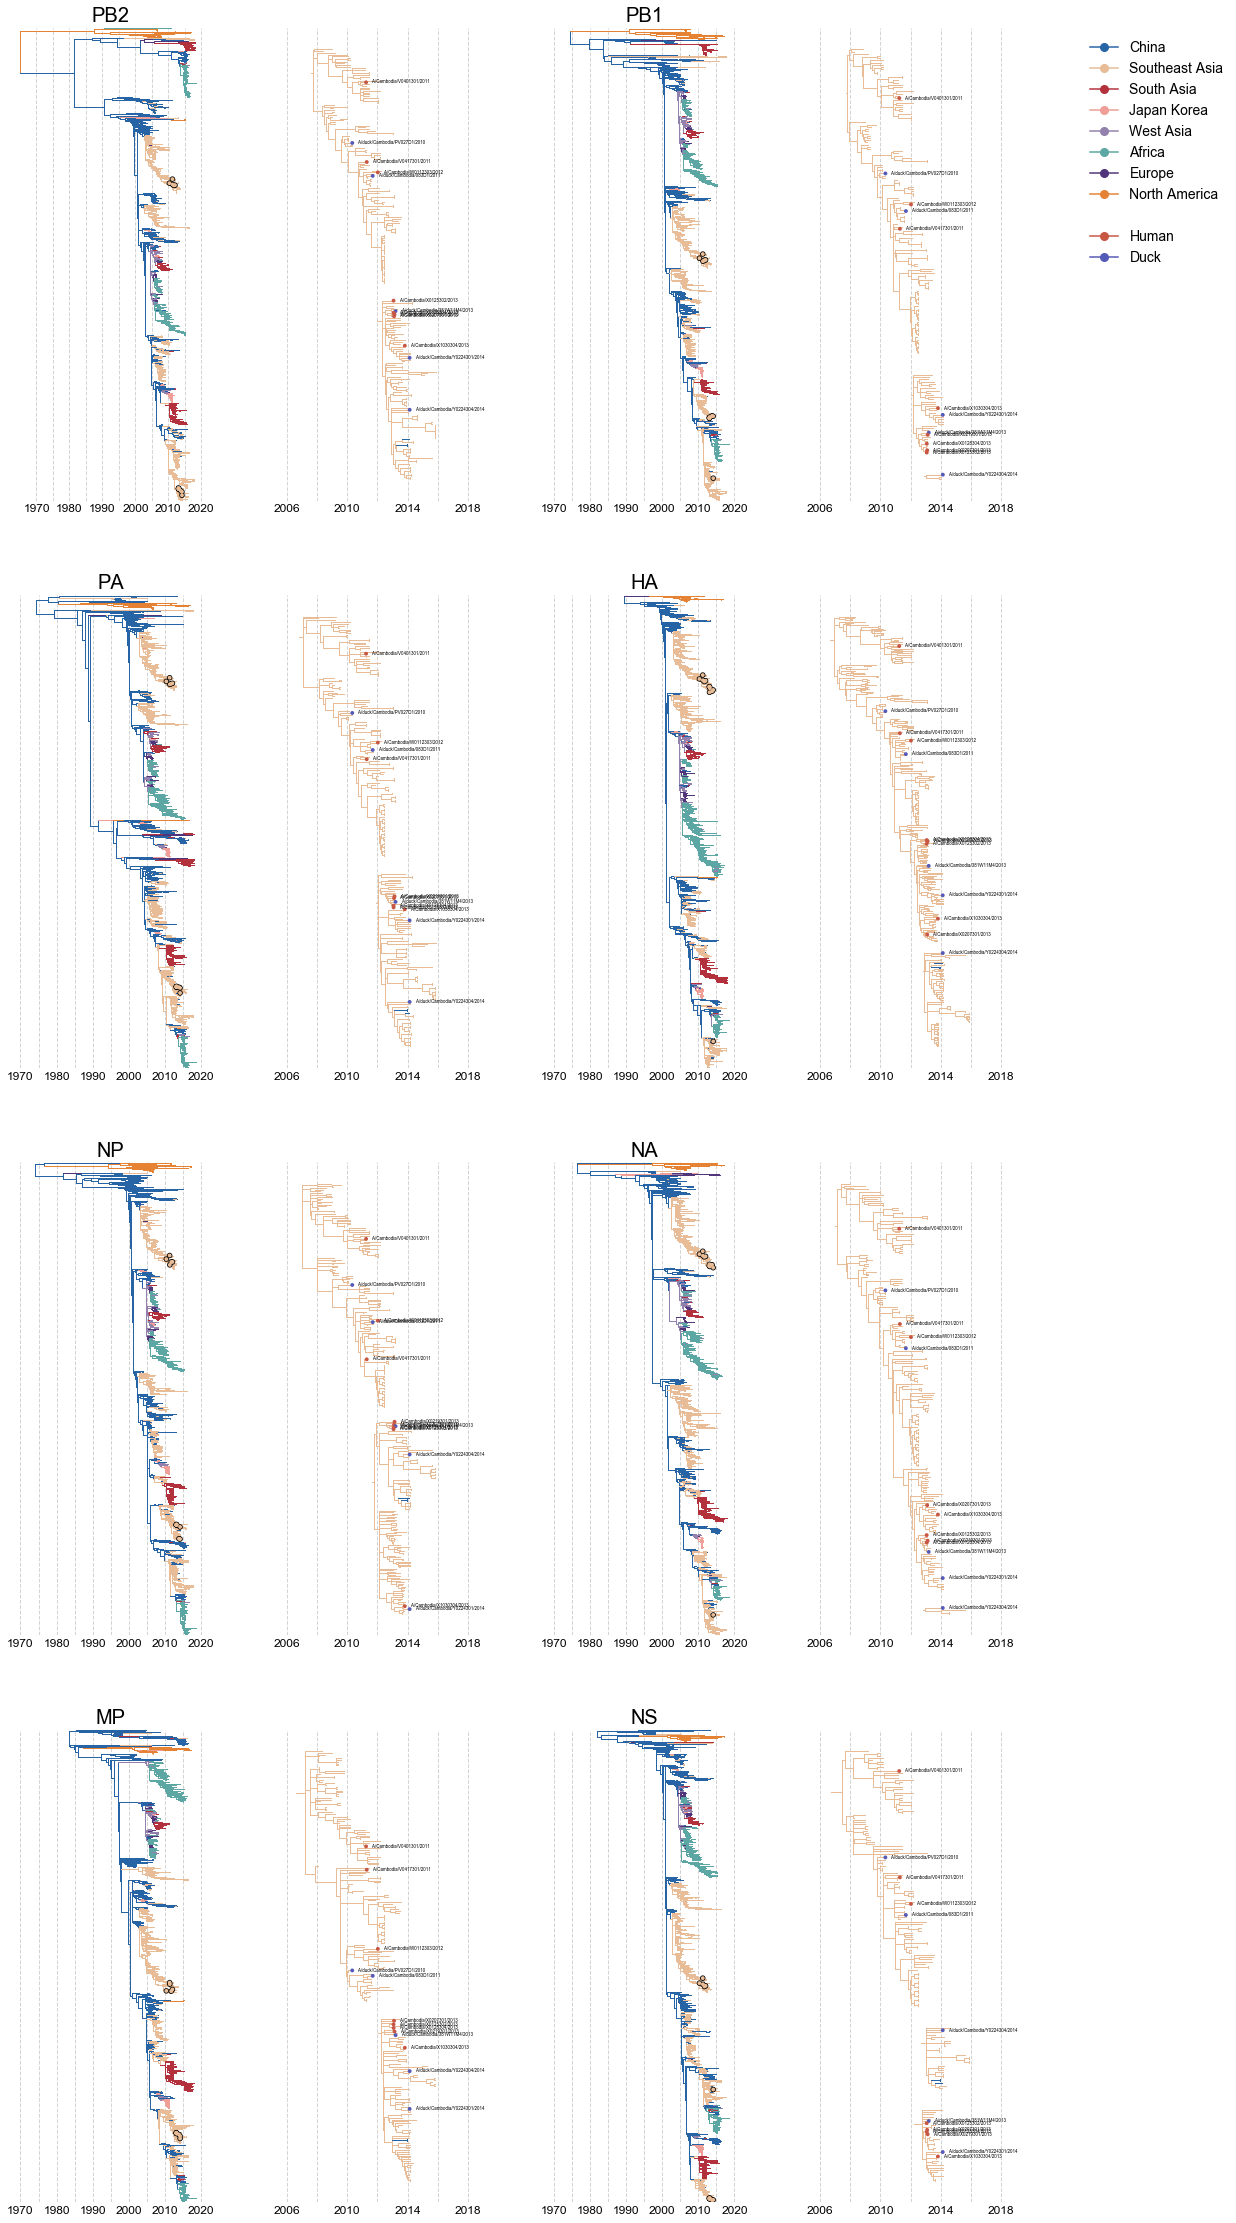

In [150]:
fig,((ax1,ax2,ax3,ax4,ax17),(ax5,ax6,ax7,ax8,ax18),(ax9,ax10,ax11,ax12,ax19),(ax13,ax14,ax15,ax16,ax20)) = plt.subplots(4, 5, gridspec_kw={'width_ratios': [4,4,4,4,1], 'wspace':0.4}, figsize=(20,40),facecolor='w')  # the dimensions here are width x height

full_trees_axes_dict = {"PB2":ax1,"PB1":ax3,"PA":ax5,"HA":ax7,"NP":ax9,"NA":ax11,"MP":ax13,"NS":ax15}
subtrees_axes_dict = {"PB2":ax2,"PB1":ax4,"PA":ax6,"HA":ax8,"NP":ax10,"NA":ax12,"MP":ax14,"NS":ax16}

branchWidth=1 ## default branch width

# this sets the grey vertical shading 
every=5
xDates=['%04d-%02d-01'%(y,m) for y in range(1970,2025) for m in range(0,56)]

for f in full_trees: 
    a = full_trees_axes_dict[f]
    [a.axvline(i,ls='--',lw=1,color='#D3D3D3',zorder=0) for i in range(1970,2025,5)]
    full_tree = full_trees[f]
    title = f 
    
    for k in full_tree.Objects: ## iterate over objects in tree

        x=k.absoluteTime ## or from x position determined earlier
        y=k.y ## get y position from .drawTree that was run earlier, but could be anything else

        xp=k.parent.absoluteTime ## get x position of current object's parent
        if x==None: ## matplotlib won't plot Nones, like root
            x=0.0
        if xp==None:
            xp=x

        c='k'
        c=region_colors[k.traits['region']]

        if k.branchType=='leaf': ## if leaf...
            if k.traits['strain'] in mylist:
                s=15 ## tip size can be fixed
                shape = 'o'
            else:
                s=0
                shape = 'o'

            a.scatter(x,y,s=s,facecolor=c,edgecolor='none',marker=shape,zorder=11) ## plot circle for every tip
            a.scatter(x,y,s=s*2,facecolor='k',edgecolor='none',marker=shape,zorder=10) ## plot black circle underneath

        elif k.branchType=='node': ## if node...
            #branchWidth+=10.0*len(k.leaves)/float(L)   # make deeper branches fatter
            #c="#9F9F9F"

            if len(k.children)==1:
                a.scatter(x,y,facecolor=c,s=50,edgecolor='none',zorder=10,lw=branchWidth,marker='|') ## mark every node in the tree to highlight that it's a multitype tree
            a.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color=c,ls='-',zorder=9,solid_capstyle='round')

        a.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=9)


    # set axis limits, remove border lines         
    a.spines['left'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)
    a.spines['bottom'].set_visible(False)

    a.set_ylim(-5,full_tree.ySpan+5)
    a.tick_params(axis='y',labelsize=0,size=0)
    a.tick_params(axis='x',labelsize=16,size=0)
    a.set_yticklabels([])
    #a.grid(axis='x',ls='-',color='grey')
    a.set_xticks([1970, 1980, 1990, 2000, 2010, 2020])
    a.set_xticklabels([1970, 1980, 1990, 2000, 2010, 2020], fontsize=12)
    
    # add a title to each subplot
    a.set_title(title, fontsize=20)

##############################################################
## CLOSEUP TREE ##
##############################################################
branchWidth = 1
tipSize = 15
label_text_size = 4.5

branchwidth_func = lambda k: branchWidth

cumulative_y = 0
x_attr=lambda k: k.absoluteTime
y_attr=lambda k: k.y - y_value_to_subtract

tip_c_func=lambda k: not_mine_color if k.traits['strain'] not in my_list else (duck_color if "duck" in k.traits['strain'] else human_color)
node_c_func=lambda k: region_colors[k.traits['region']]
s_func = lambda k: 0 if k.traits['strain'] not in my_list else tipSize
z_func=lambda k: 99 if k.traits['strain'] not in my_list else 100

# labels
label_target_func = lambda k:k.branchType=='leaf' and k.traits['strain'] in my_list
label_position_func = lambda k:(k.absoluteTime + (k.absoluteTime*0.0002), k.y-y_value_to_subtract-0.5)
label_text_func = lambda k:k.traits['strain']

for g in gene_subtrees:
    
    # set up axes, values to subtract
    a = subtrees_axes_dict[g]
    [a.axvline(i,ls='--',lw=1,color='#D3D3D3',zorder=0) for i in range(2006,2020,2)]
    title = g

    max_min_y_values = find_max_and_min_y_values(gene_subtrees[g])
    values_to_subtract = calculate_differences_between_trees(max_min_y_values)
    
    for subtree in gene_subtrees[g]:

        # subtract y values to rescale plotting area
        if subtree in values_to_subtract:
            y_value_to_subtract = values_to_subtract[subtree]
        else:
            y_value_to_subtract = 0

        subtree.plotTree(a,x_attr=x_attr,y_attr=y_attr, colour_function=node_c_func,branchWidth=branchwidth_func)
        subtree.plotPoints(a,x_attr=x_attr,y_attr=y_attr, size_function=s_func,
                                        colour_function=tip_c_func,zorder_function=z_func)
        subtree.addText(a,target=label_target_func,position=label_position_func,text=label_text_func,size=label_text_size)

        # set axis limits, remove border lines         
        a.spines['left'].set_visible(False)
        a.spines['right'].set_visible(False)
        a.spines['top'].set_visible(False)
        a.spines['bottom'].set_visible(False)

        #ax.set_xlim(0.009,0.0105)
        a.tick_params(axis='y',labelsize=0,size=0)
        a.tick_params(axis='x',labelsize=16,size=0, width=0,color='grey')
        a.set_yticklabels([])
        a.set_xticks([2006,2010,2014,2018])
        a.set_xticklabels([2006,2010,2014,2018], fontsize=12)
        
        # add a title to each subplot
        # a.set_title(title, fontsize=20)
# add in a legend
han_list = []

for key in region_colors:
    marker = mlines.Line2D(range(1), range(1), color = region_colors[key], marker='o', markerfacecolor = region_colors[key], label = key.replace("_"," ").title(), markersize = 8)
    han_list.append(marker)
ax17.legend(handles = han_list,markerfirst = True, frameon=False, loc=2, fontsize=14)

# format legend and empty plot; set axis limits, remove border lines         
ax17.spines['left'].set_visible(False)
ax17.spines['right'].set_visible(False)
ax17.spines['top'].set_visible(False)
ax17.spines['bottom'].set_visible(False)
ax17.tick_params(axis='y',labelsize=0,size=0)
ax17.tick_params(axis='x',labelsize=0,size=0)
ax17.set_yticklabels([])
ax17.set_xticklabels([])

for a in [ax18,ax19,ax20]:
    a.spines['left'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    a.tick_params(axis='y',labelsize=0,size=0)
    a.tick_params(axis='x',labelsize=0,size=0)
    a.set_xticklabels([])
    a.set_yticklabels([])

plt.savefig('/Users/lmoncla/Documents/H5N1_Cambodian_outbreak_study/paper-and-figure-drafts/Plos-Pathogens/resubmission/individual-PDFs/Fig-S2-trees-2019-09-23.pdf',bbox_inches = 'tight',pad_inches = 0)
plt.show()